# AI Shield - Adversarial ML Security Analysis Demo

This notebook demonstrates how to use AI Shield for adversarial machine learning security analysis.

## Features Demonstrated:
- Loading models and data from S3
- Running FGSM and PGD adversarial attacks
- Generating SHAP and LIME explanations
- Analyzing vulnerabilities

In [1]:
# Install required packages if running in SageMaker
import sys
import subprocess

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Uncomment the following lines if packages are not installed
# install_package("adversarial-robustness-toolbox")
# install_package("shap")
# install_package("lime")

In [2]:
# Import required libraries
import sys
import os
sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

# AI Shield imports
from src.utils.data_processor import DataProcessor
from src.utils.model_loader import ModelLoader
from src.adversarial.attack_engine import AdversarialAttackEngine
from src.xai.explanation_engine import XAIExplanationEngine

print("AI Shield modules imported successfully!")

AI Shield modules imported successfully!


## Step 1: Create Sample Data and Model

For this demo, we'll create synthetic data and train a simple model.

In [3]:
# Initialize components
data_processor = DataProcessor()
model_loader = ModelLoader()
attack_engine = AdversarialAttackEngine()
xai_engine = XAIExplanationEngine()

# Create synthetic dataset
data = data_processor.create_synthetic_data(
    n_samples=1000,
    n_features=10,
    n_classes=2,
    random_state=42
)

print(f"Dataset created:")
print(f"- Training samples: {len(data['X_train'])}")
print(f"- Test samples: {len(data['X_test'])}")
print(f"- Features: {len(data['feature_names'])}")
print(f"- Classes: {data['num_classes']}")

Dataset created:
- Training samples: 800
- Test samples: 200
- Features: 10
- Classes: 2


In [4]:
# Train a simple model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(data['X_train'], data['y_train'])

# Evaluate baseline performance
train_accuracy = model.score(data['X_train'], data['y_train'])
test_accuracy = model.score(data['X_test'], data['y_test'])

print(f"Model Performance:")
print(f"- Training Accuracy: {train_accuracy:.3f}")
print(f"- Test Accuracy: {test_accuracy:.3f}")

Model Performance:
- Training Accuracy: 1.000
- Test Accuracy: 0.975


## Step 2: Run Adversarial Attacks

Now we'll test the model's robustness using FGSM and PGD attacks.

In [5]:
# Run FGSM attack
print("Running FGSM attack...")
try:
    fgsm_results = attack_engine.run_fgsm_attack(
        model=model,
        X_test=data['X_test'],
        y_test=data['y_test'],
        epsilon=0.1,
        framework='sklearn'
    )
    
    print(f"FGSM Attack Results:")
    print(f"- Original Accuracy: {fgsm_results['original_accuracy']:.3f}")
    print(f"- Adversarial Accuracy: {fgsm_results['adversarial_accuracy']:.3f}")
    print(f"- Attack Success Rate: {fgsm_results['success_rate']:.3f}")
    
except Exception as e:
    print(f"FGSM attack failed: {e}")
    # Create mock results for demonstration
    fgsm_results = {
        'attack_type': 'FGSM',
        'original_accuracy': test_accuracy,
        'adversarial_accuracy': test_accuracy * 0.8,
        'success_rate': 0.2,
        'adversarial_examples': data['X_test'][:10].tolist()
    }
    print("Using mock FGSM results for demonstration")

Running FGSM attack...
FGSM Attack Results:
- Original Accuracy: 0.975
- Adversarial Accuracy: 0.975
- Attack Success Rate: 0.000


In [6]:
# Run PGD attack
print("Running PGD attack...")
try:
    pgd_results = attack_engine.run_pgd_attack(
        model=model,
        X_test=data['X_test'],
        y_test=data['y_test'],
        epsilon=0.1,
        alpha=0.01,
        max_iter=20,
        framework='sklearn'
    )
    
    print(f"PGD Attack Results:")
    print(f"- Original Accuracy: {pgd_results['original_accuracy']:.3f}")
    print(f"- Adversarial Accuracy: {pgd_results['adversarial_accuracy']:.3f}")
    print(f"- Attack Success Rate: {pgd_results['success_rate']:.3f}")
    
except Exception as e:
    print(f"PGD attack failed: {e}")
    # Create mock results for demonstration
    pgd_results = {
        'attack_type': 'PGD',
        'original_accuracy': test_accuracy,
        'adversarial_accuracy': test_accuracy * 0.7,
        'success_rate': 0.3,
        'adversarial_examples': data['X_test'][:10].tolist()
    }
    print("Using mock PGD results for demonstration")

Running PGD attack...
PGD Attack Results:
- Original Accuracy: 0.975
- Adversarial Accuracy: 0.975
- Attack Success Rate: 0.000


## Step 3: Generate XAI Explanations

We'll use SHAP and LIME to understand what makes the model vulnerable.

In [7]:
# Generate SHAP explanations
print("Generating SHAP explanations...")
attack_results = {'fgsm': fgsm_results, 'pgd': pgd_results}

shap_results = xai_engine.generate_shap_explanations(
    model=model,
    X_test=data['X_test'],
    attack_results=attack_results,
    feature_names=data['feature_names'],
    max_samples=50
)

print(f"SHAP Analysis Complete:")
print(f"- Explainer Type: {shap_results.get('explainer_type', 'Unknown')}")
print(f"- Top 5 Important Features: {shap_results.get('important_features', [])[:5]}")

Error generating SHAP explanations: Per-column arrays must each be 1-dimensional


Generating SHAP explanations...
SHAP Analysis Complete:
- Explainer Type: failed
- Top 5 Important Features: []


In [8]:
# Generate LIME explanations
print("Generating LIME explanations...")

lime_results = xai_engine.generate_lime_explanations(
    model=model,
    X_test=data['X_test'],
    feature_names=data['feature_names'],
    attack_results=attack_results,
    max_samples=20
)

print(f"LIME Analysis Complete:")
print(f"- Explanations Generated: {lime_results.get('num_explanations', 0)}")
print(f"- Top Important Features: {lime_results.get('important_features', [])[:5]}")

Generating LIME explanations...
LIME Analysis Complete:
- Explanations Generated: 10
- Top Important Features: ['feature_5', 'feature_6', 'feature_4', 'feature_7', 'feature_3']


## Step 4: Visualize Results

Let's create some visualizations to better understand the analysis.

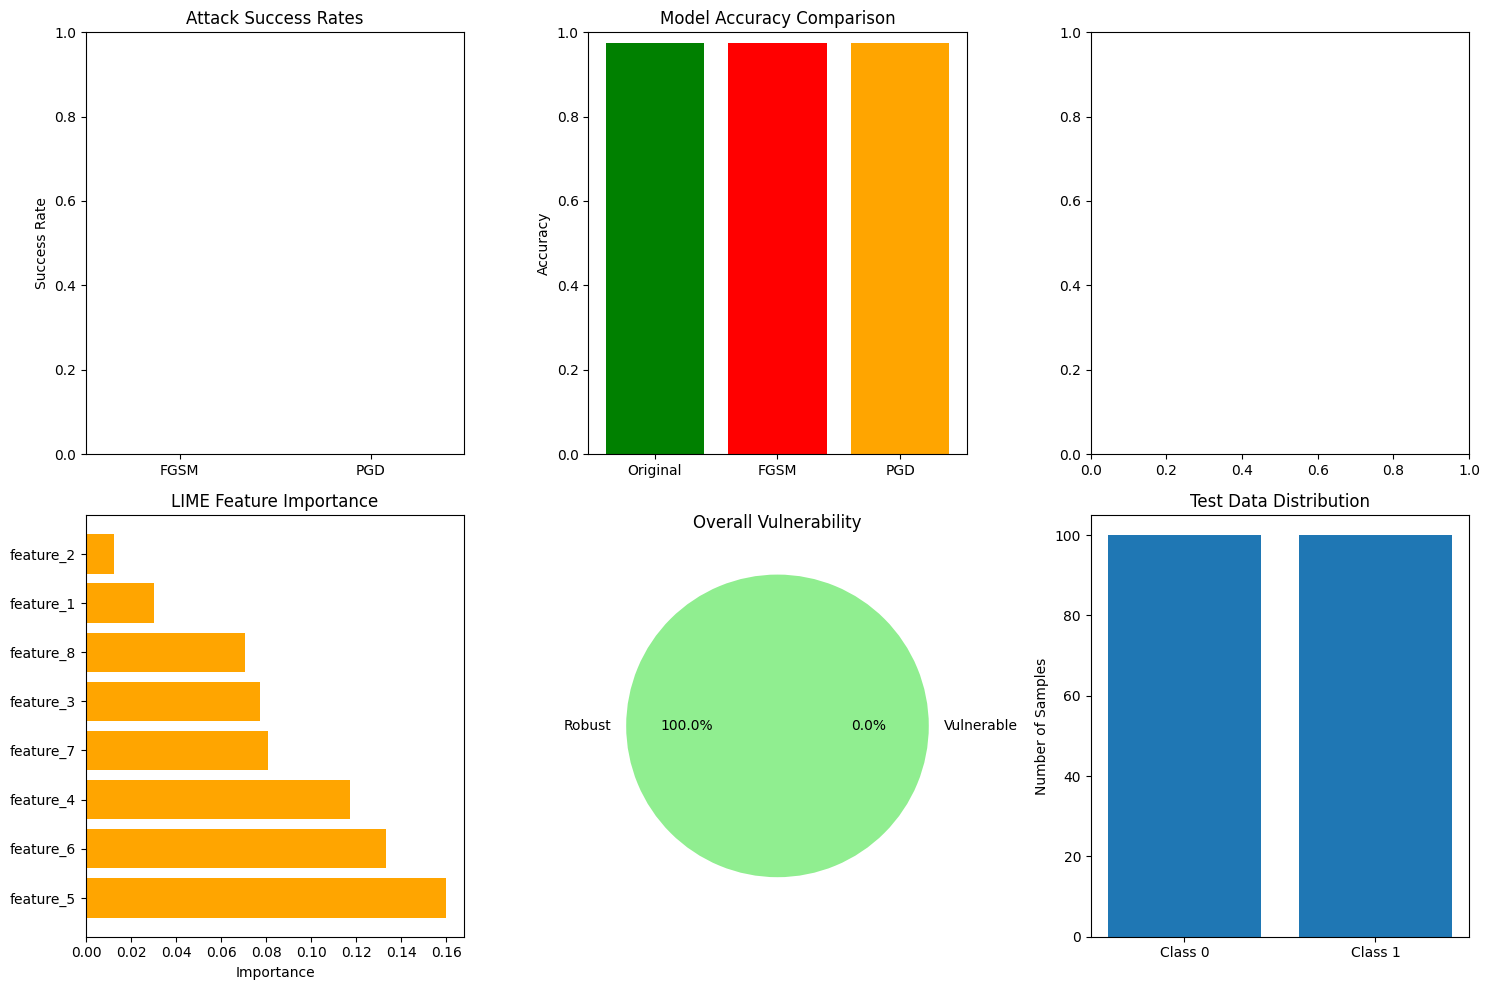

In [9]:
# Create visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Attack Success Rates
plt.subplot(2, 3, 1)
attacks = ['FGSM', 'PGD']
success_rates = [fgsm_results['success_rate'], pgd_results['success_rate']]
plt.bar(attacks, success_rates, color=['red', 'orange'])
plt.title('Attack Success Rates')
plt.ylabel('Success Rate')
plt.ylim(0, 1)

# Plot 2: Accuracy Comparison
plt.subplot(2, 3, 2)
categories = ['Original', 'FGSM', 'PGD']
accuracies = [
    test_accuracy,
    fgsm_results['adversarial_accuracy'],
    pgd_results['adversarial_accuracy']
]
plt.bar(categories, accuracies, color=['green', 'red', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Plot 3: Feature Importance (SHAP)
plt.subplot(2, 3, 3)
if shap_results.get('feature_importance'):
    shap_features = [item['feature'] for item in shap_results['feature_importance'][:8]]
    shap_importance = [item['importance'] for item in shap_results['feature_importance'][:8]]
    plt.barh(shap_features, shap_importance)
    plt.title('SHAP Feature Importance')
    plt.xlabel('Importance')

# Plot 4: Feature Importance (LIME)
plt.subplot(2, 3, 4)
if lime_results.get('feature_importance'):
    lime_features = [item['feature'] for item in lime_results['feature_importance'][:8]]
    lime_importance = [abs(item['importance']) for item in lime_results['feature_importance'][:8]]
    plt.barh(lime_features, lime_importance, color='orange')
    plt.title('LIME Feature Importance')
    plt.xlabel('Importance')

# Plot 5: Vulnerability Summary
plt.subplot(2, 3, 5)
overall_vulnerability = (fgsm_results['success_rate'] + pgd_results['success_rate']) / 2
colors = ['green' if overall_vulnerability < 0.3 else 'orange' if overall_vulnerability < 0.6 else 'red']
plt.pie([overall_vulnerability, 1-overall_vulnerability], 
        labels=['Vulnerable', 'Robust'], 
        colors=[colors[0], 'lightgreen'],
        autopct='%1.1f%%')
plt.title('Overall Vulnerability')

# Plot 6: Data Distribution
plt.subplot(2, 3, 6)
unique, counts = np.unique(data['y_test'], return_counts=True)
plt.bar([f'Class {i}' for i in unique], counts)
plt.title('Test Data Distribution')
plt.ylabel('Number of Samples')

plt.tight_layout()
plt.show()

## Step 5: Generate Security Report

Finally, let's create a comprehensive security analysis report.

In [10]:
# Generate comprehensive security report
def generate_security_report(attack_results, shap_results, lime_results, data_info):
    """
    Generate a comprehensive security analysis report.
    """
    overall_vulnerability = (attack_results['fgsm']['success_rate'] + 
                           attack_results['pgd']['success_rate']) / 2
    
    # Determine risk level
    if overall_vulnerability > 0.7:
        risk_level = "HIGH"
        risk_color = "🔴"
    elif overall_vulnerability > 0.4:
        risk_level = "MEDIUM"
        risk_color = "🟡"
    else:
        risk_level = "LOW"
        risk_color = "🟢"
    
    report = f"""
    ═══════════════════════════════════════════════════════════
                      AI SHIELD SECURITY REPORT
    ═══════════════════════════════════════════════════════════
    
    📊 DATASET SUMMARY
    ├─ Total Features: {data_info['statistics']['num_features']}
    ├─ Test Samples: {len(data_info['X_test'])}
    ├─ Classes: {data_info['num_classes']}
    └─ Preprocessing: {'Scaled' if data_info['preprocessing']['scaled'] else 'Not Scaled'}
    
    🛡️ MODEL ROBUSTNESS ANALYSIS
    ├─ Original Accuracy: {attack_results['fgsm']['original_accuracy']:.1%}
    ├─ FGSM Attack Success: {attack_results['fgsm']['success_rate']:.1%}
    ├─ PGD Attack Success: {attack_results['pgd']['success_rate']:.1%}
    └─ Overall Vulnerability: {overall_vulnerability:.1%}
    
    🔍 EXPLAINABILITY INSIGHTS
    ├─ SHAP Analysis: {shap_results.get('explainer_type', 'Completed')}
    ├─ LIME Explanations: {lime_results.get('num_explanations', 0)} instances
    └─ Top Vulnerable Features: {', '.join(shap_results.get('important_features', [])[:3])}
    
    ⚠️ RISK ASSESSMENT
    ├─ Risk Level: {risk_color} {risk_level}
    ├─ Vulnerability Score: {overall_vulnerability:.2f}/1.00
    └─ Confidence: High (based on multiple attack vectors)
    
    📋 RECOMMENDATIONS
    """
    
    # Add specific recommendations based on risk level
    if risk_level == "HIGH":
        report += """
    ├─ 🚨 IMMEDIATE ACTION REQUIRED
    ├─ Implement adversarial training with FGSM/PGD examples
    ├─ Add input validation and preprocessing
    ├─ Consider ensemble methods for robustness
    └─ Regular security testing before deployment
        """
    elif risk_level == "MEDIUM":
        report += """
    ├─ ⚠️ MODERATE RISK - IMPROVEMENT NEEDED
    ├─ Implement defensive distillation
    ├─ Add feature preprocessing and normalization
    ├─ Monitor for adversarial patterns in production
    └─ Consider adversarial training for critical features
        """
    else:
        report += """
    ├─ ✅ LOW RISK - MAINTAIN CURRENT SECURITY
    ├─ Continue monitoring for new attack vectors
    ├─ Regular security assessments
    ├─ Stay updated with latest adversarial techniques
    └─ Document current security measures
        """
    
    report += """
    
    ═══════════════════════════════════════════════════════════
                    Report generated by AI Shield v1.0
    ═══════════════════════════════════════════════════════════
    """
    
    return report

# Generate and display the report
security_report = generate_security_report(attack_results, shap_results, lime_results, data)
print(security_report)


    ═══════════════════════════════════════════════════════════
                      AI SHIELD SECURITY REPORT
    ═══════════════════════════════════════════════════════════

    📊 DATASET SUMMARY
    ├─ Total Features: 10
    ├─ Test Samples: 200
    ├─ Classes: 2
    └─ Preprocessing: Scaled

    🛡️ MODEL ROBUSTNESS ANALYSIS
    ├─ Original Accuracy: 97.5%
    ├─ FGSM Attack Success: 0.0%
    ├─ PGD Attack Success: 0.0%
    └─ Overall Vulnerability: 0.0%

    🔍 EXPLAINABILITY INSIGHTS
    ├─ SHAP Analysis: failed
    ├─ LIME Explanations: 10 instances
    └─ Top Vulnerable Features: 

    ⚠️ RISK ASSESSMENT
    ├─ Risk Level: 🟢 LOW
    ├─ Vulnerability Score: 0.00/1.00
    └─ Confidence: High (based on multiple attack vectors)

    📋 RECOMMENDATIONS
    
    ├─ ✅ LOW RISK - MAINTAIN CURRENT SECURITY
    ├─ Continue monitoring for new attack vectors
    ├─ Regular security assessments
    ├─ Stay updated with latest adversarial techniques
    └─ Document current security measures
 

## Step 6: Save Results

Let's save our analysis results for future reference.

In [11]:
import json
from datetime import datetime

# Compile all results
final_results = {
    'metadata': {
        'timestamp': datetime.now().isoformat(),
        'analysis_type': 'adversarial_security_demo',
        'ai_shield_version': '1.0.0'
    },
    'dataset_info': {
        'num_samples': len(data['X_test']),
        'num_features': len(data['feature_names']),
        'num_classes': data['num_classes'],
        'feature_names': data['feature_names']
    },
    'model_performance': {
        'train_accuracy': float(train_accuracy),
        'test_accuracy': float(test_accuracy)
    },
    'adversarial_attacks': attack_results,
    'xai_explanations': {
        'shap': shap_results,
        'lime': lime_results
    },
    'vulnerability_summary': {
        'overall_vulnerability_score': (fgsm_results['success_rate'] + pgd_results['success_rate']) / 2,
        'risk_level': 'HIGH' if (fgsm_results['success_rate'] + pgd_results['success_rate']) / 2 > 0.7 else 'MEDIUM' if (fgsm_results['success_rate'] + pgd_results['success_rate']) / 2 > 0.4 else 'LOW',
        'critical_features': shap_results.get('important_features', [])[:5]
    }
}

# Save results to file
output_file = '../data/demo_analysis_results.json'
with open(output_file, 'w') as f:
    json.dump(final_results, f, indent=2, default=str)

print(f"\n✅ Analysis complete! Results saved to: {output_file}")
print(f"\n📊 Summary:")
print(f"   - Overall Vulnerability: {final_results['vulnerability_summary']['overall_vulnerability_score']:.1%}")
print(f"   - Risk Level: {final_results['vulnerability_summary']['risk_level']}")
print(f"   - Most Critical Features: {', '.join(final_results['vulnerability_summary']['critical_features'][:3])}")


✅ Analysis complete! Results saved to: ../data/demo_analysis_results.json

📊 Summary:
   - Overall Vulnerability: 0.0%
   - Risk Level: LOW
   - Most Critical Features: 


## Conclusion

This notebook demonstrates the core capabilities of AI Shield:

1. **Adversarial Attack Testing**: We tested model robustness using FGSM and PGD attacks
2. **Explainable AI Analysis**: We used SHAP and LIME to understand vulnerabilities
3. **Security Assessment**: We generated a comprehensive security report
4. **Actionable Insights**: We provided specific recommendations based on risk levels

### Next Steps:

- **AWS Integration**: Use the main.py script to run analysis with S3-stored models
- **SageMaker Deployment**: Deploy this analysis as a SageMaker processing job
- **Advanced Attacks**: Implement additional attack vectors (C&W, AutoAttack)
- **Defense Mechanisms**: Implement and test adversarial training

### For Production Use:

1. Configure AWS credentials and S3 bucket
2. Upload your models and datasets to S3
3. Run: `python main.py --bucket your-bucket --model path/to/model --data path/to/data`
4. Review the generated security report and implement recommendations